In [7]:
# text stuff
import re, string
# visualization
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# nltk imports
## word tokenizing
from nltk.tokenize import word_tokenize
## sentence tokenizing
from nltk import sent_tokenize


Pulled from https://machinelearningmastery.com/clean-text-machine-learning-python/

- the metamorphosis is downloaded from Project Gutenberg as metamorphosis.txt.
- after removing the Gutenberg headers and footers the file is saved as metamorphosis_clean.txt

Notes on the initial cleaned version

    It’s plain text so there is no markup to parse (yay!).
    The translation of the original German uses UK English (e.g. “travelling“).
    The lines are artificially wrapped with new lines at about 70 characters (meh).
    There are no obvious typos or spelling mistakes.
    There’s punctuation like commas, apostrophes, quotes, question marks, and more.
    There’s hyphenated descriptions like “armour-like”.
    There’s a lot of use of the em dash (“-“) to continue sentences (maybe replace with commas?).
    There are names (e.g. “Mr. Samsa“)
    There does not appear to be numbers that require handling (e.g. 1999)
    There are section markers (e.g. “II” and “III”), and we have removed the first “I”.


In [2]:
ls

Cleaning Text for Machine Learning Using NLTK.ipynb
Formatting Seaborn Charts.ipynb
Honeypot Logs in Pandas.ipynb
README.md
Seaborn Bubble Plot.ipynb
Untitled.ipynb
Untitled1.ipynb
Word Heatmaps.ipynb
folium_demo.py
metamorphosis.txt
metamorphosis_clean.txt
pg5200.txt
session.json


## Manual Tokenization

- in-word punctuation is preserved (armour-like)
- so are chunks of statements ('"What's' and 'thought.')


**Splitting by whitespace**

In [5]:
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words by white space
words = text.split()
print(words[:100])

['\ufeff', 'Metamorphosis', 'Franz', 'Kafka', 'I', 'One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.']


**or - only grab words with regex**

In [24]:
# split based on words only
import re
words = re.split(r'\W+', text)
print(words[:100])

['', 'One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 's', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasn', 't', 'a', 'dream', 'His']


**Removing punctuation**

- import the python constant "punctuation"
- make a map of all the ascii chars with .maketrans() 
- "What's" has become "Whats" and "armor-like" becomes "armorlike".
- "dream." has become "dream"

In [10]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped[:100])

['\ufeff', 'Metamorphosis', 'Franz', 'Kafka', 'I', 'One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'Whats', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasnt', 'a', 'dream']


**Normalizing case**
- Easily done with .lower() to recreate the words list

In [11]:

words = [word.lower() for word in words]

In [13]:
print(words[:100])

['\ufeff', 'metamorphosis', 'franz', 'kafka', 'i', 'one', 'morning,', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'he', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'his', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"what\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'it', "wasn't", 'a', 'dream.']


## Tokenization and cleaning with NLTK

**Splitting into sentences**

In [16]:
# split into sentences
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[0])

﻿
One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


**Split into words**


In [21]:
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens[:100])

['\ufeff', 'One', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', '.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', '.', 'His', 'many', 'legs', ',', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', '.', '``', 'What', "'s", 'happened']


**Strip punctuation and numbers, et al**
- using .isalpha()

In [18]:
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 'happened', 'to', 'me', 'he', 'thought', 'It', 'was', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human', 'room']


**Filtering out stopwords**

- pulling out words that don't contribute to the deeper meaning of the phrase. (e.g. “the“, “a“, and “is“)

In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Pipelining the text cleaning**

Pipeline:
    - Load the raw text.
    - Split into tokens.
    - Convert to lowercase.
    - Remove punctuation from each token.
    - Filter out remaining tokens that are not alphabetic.
    - Filter out tokens that are stop words.


In [27]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armourlike', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arches', 'stiff', 'sections', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'legs', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'nt', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'walls', 'collection', 'textile', 'samples', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer']


**Grabbing stemmed words using PorterStemmer**

- break down words to their stems
- reducing each word to its root or base. (e.g. “fishing,” “fished,” “fisher” all reduce to the stem “fish.”)


In [30]:
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

['one', 'morn', 'gregor', 'samsa', 'woke', 'troubl', 'dream', 'found', 'transform', 'bed', 'horribl', 'vermin', 'lay', 'armourlik', 'back', 'lift', 'head', 'littl', 'could', 'see', 'brown', 'belli', 'slightli', 'dome', 'divid', 'arch', 'stiff', 'section', 'bed', 'hardli', 'abl', 'cover', 'seem', 'readi', 'slide', 'moment', 'mani', 'leg', 'piti', 'thin', 'compar', 'size', 'rest', 'wave', 'helplessli', 'look', 'happen', 'thought', 'nt', 'dream', 'room', 'proper', 'human', 'room', 'although', 'littl', 'small', 'lay', 'peac', 'four', 'familiar', 'wall', 'collect', 'textil', 'sampl', 'lay', 'spread', 'tabl', 'samsa', 'travel', 'salesman', 'hung', 'pictur', 'recent', 'cut', 'illustr', 'magazin', 'hous', 'nice', 'gild', 'frame', 'show', 'ladi', 'fit', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'rais', 'heavi', 'fur', 'muff', 'cover', 'whole', 'lower', 'arm', 'toward', 'viewer']


## Analyzing and visualizing the text

### Counting individual tokens

**making  dict of word counts**

In [32]:
# using pre-stemmed tokens
wordcount = {}
for w in words:
    if w in wordcount:
        wordcount[w] += 1
    else:
        wordcount[w] = 1

pre-filtering the results
- sorting by count value
- turning the counts into a list, then slicing
- recombining output into a dict

In [44]:
top50 = dict(list(sorted(wordcount.items(), key=lambda x: x[1], reverse=True))[:50])

In [66]:
list(top50.items())[:10]

[('gregor', 289),
 ('would', 191),
 ('room', 131),
 ('could', 126),
 ('father', 102),
 ('sister', 101),
 ('door', 87),
 ('mother', 87),
 ('back', 82),
 ('even', 80)]

**barplotting the dict with pyplot.bar()**

<BarContainer object of 50 artists>

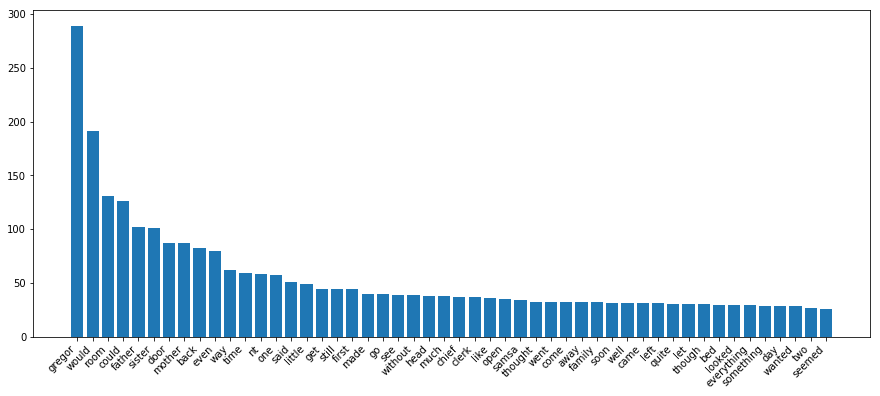

In [51]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45, ha='right')
plt.bar(top50.keys(), top50.values())

**Plotting raw counts from the list**

- this is interesting in seaborn, but it's unclear how to get all the words and not blow out the list

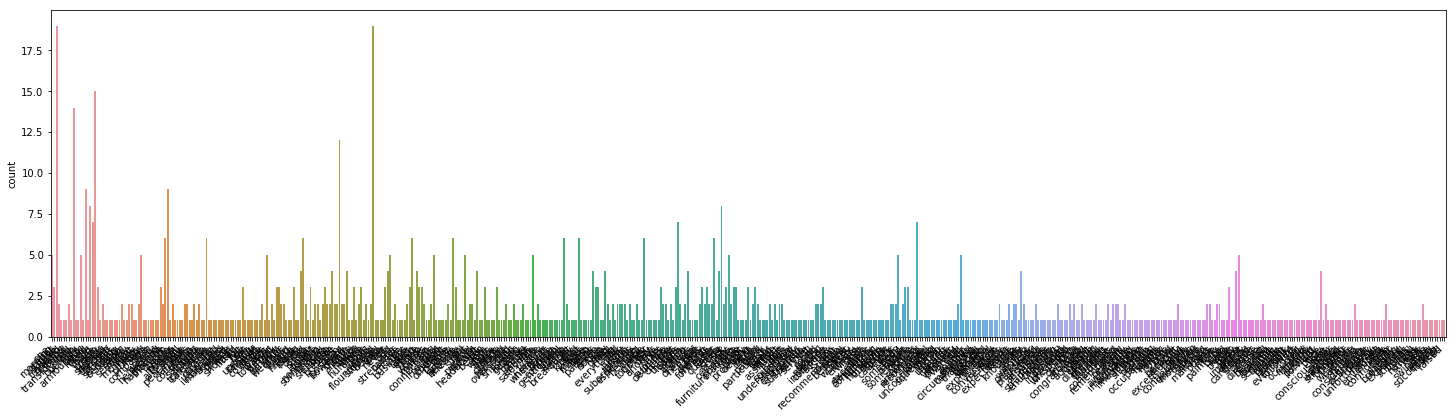

In [68]:
plt.figure(figsize=(25,6))
plt.xticks(rotation=45, ha='right')
sns.countplot(words[:1000])

Make this more interesting by grabbing the top 50 counts

**Showing a wordcloud of the top 50 terms**

- wordcloud has a built-in limiter "max_words"

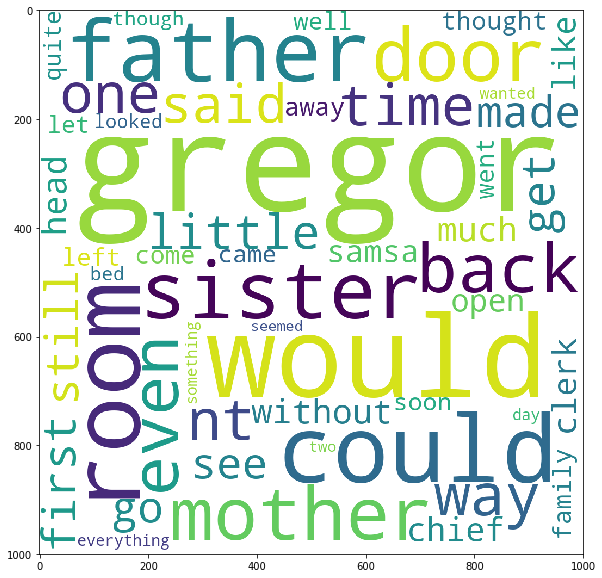

In [59]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordcount)
plt.imshow(wordcloud)

## more word clouds

In [70]:
def plot_wordcloud(data, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
#     stopwords = set(STOPWORDS)
    stopwords = stop_words
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate_from_frequencies(data)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

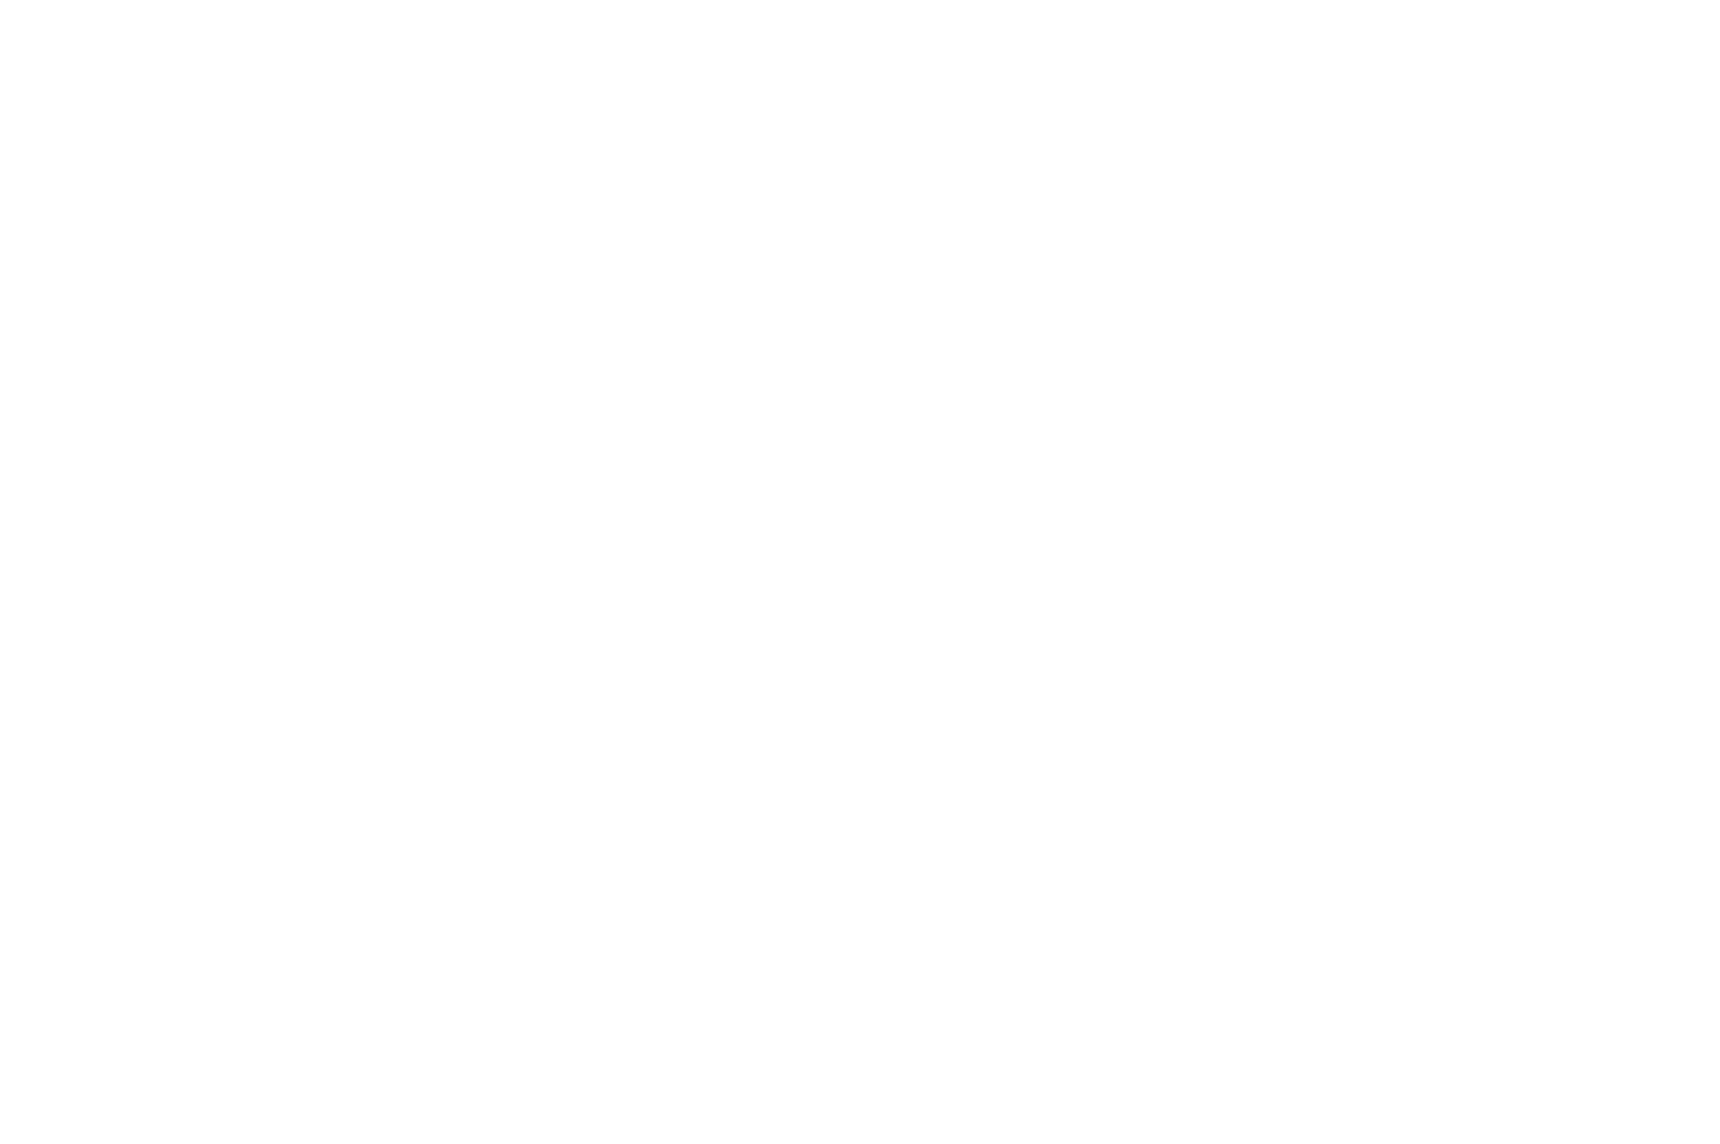

In [76]:
stopwords = stop_words
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stopwords = stopwords.union(more_stopwords)
max_words=400
max_font_size=120
figure_size=(24.0,16.0)

wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = None)
wordcloud.generate_from_frequencies(wordcount)
    
plt.figure(figsize=figure_size)
plt.axis('off');
plt.tight_layout()  